# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")



# Display the data table for preview
mouse_metadata_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count=len(mouse_metadata_complete["Mouse ID"].unique())
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_metadata_complete[mouse_metadata_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mice_data=mouse_metadata_complete[mouse_metadata_complete["Mouse ID"]== "g989"]
duplicated_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_metadata_complete = mouse_metadata_complete[mouse_metadata_complete['Mouse ID'] != 'g989']
clean_mouse_metadata_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_cleaned = clean_mouse_metadata_complete['Mouse ID'].nunique()

num_unique_mice_cleaned

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor = clean_mouse_metadata_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = clean_mouse_metadata_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor = clean_mouse_metadata_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stddev_tumor = clean_mouse_metadata_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor = clean_mouse_metadata_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev.": stddev_tumor,
    "Tumor Volume Std. Err.": sem_tumor
})


summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_df_formatted = clean_mouse_metadata_complete.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)
summary_df_formatted.columns.name = "Tumor Volume (mm3)"


# Using the aggregation method, produce the same summary statistics in a single line
summary_df_formatted

Tumor Volume (mm3),mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

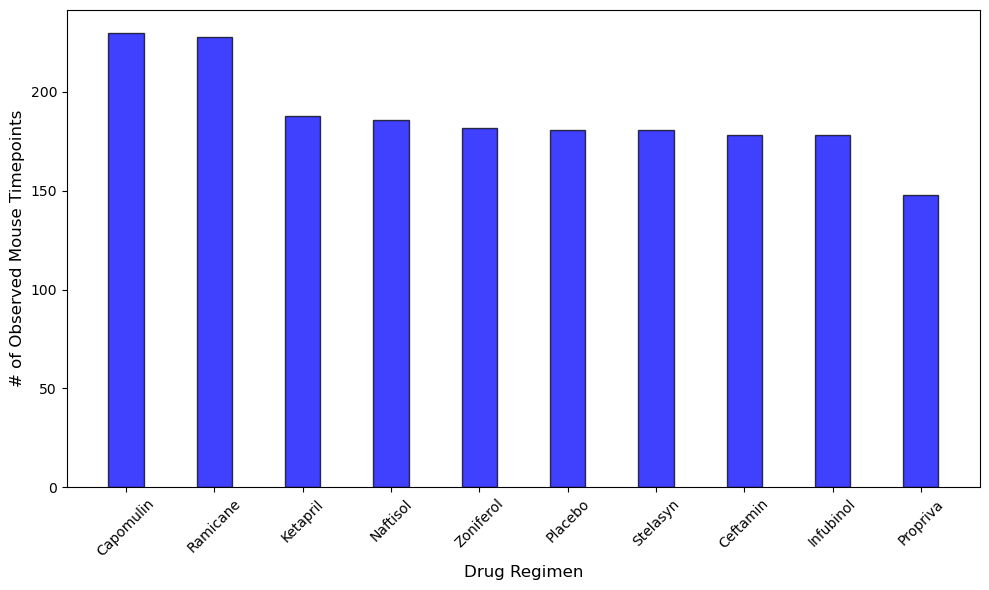

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.figure(figsize=(10, 6))
plt.bar(timepoints_per_regimen_sorted.index, timepoints_per_regimen_sorted.values, color='blue', alpha=0.75, edgecolor='black', width=0.4)

# Add labels and title
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


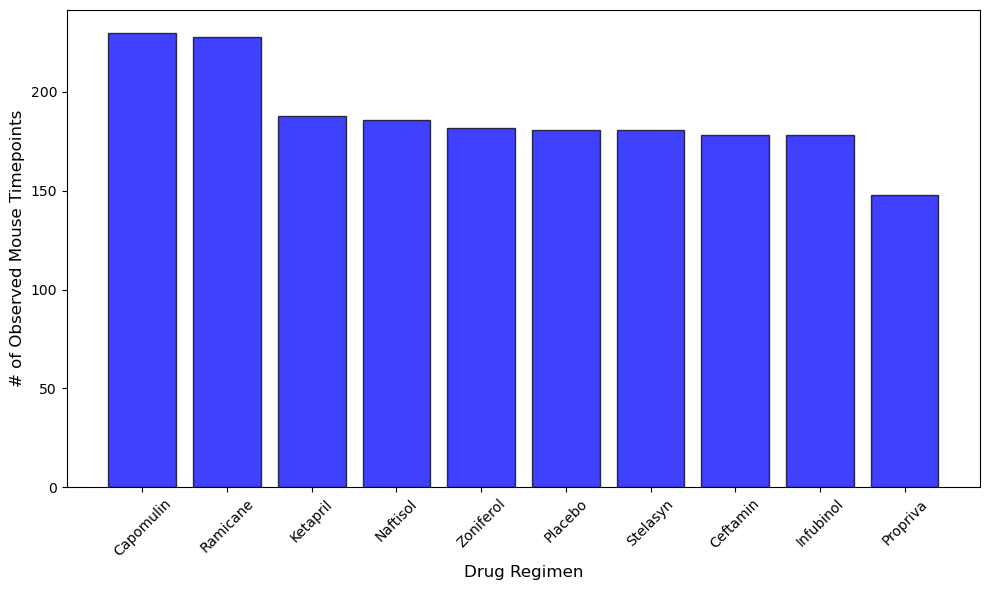

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(timepoints_per_regimen_sorted.index, timepoints_per_regimen_sorted.values, color='blue', alpha=0.75, edgecolor='black')

# Add labels and title
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

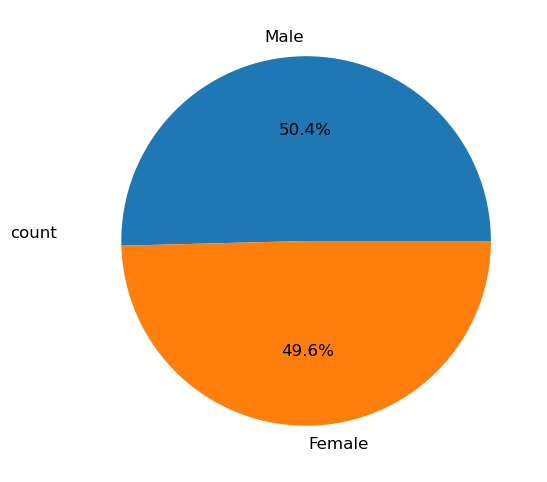

In [67]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_mouse_metadata_complete[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_distribution = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'], startangle=0, fontsize=12)
plt.ylabel('count', fontsize=12, rotation=0, labelpad=30) 


# Show the plot
plt.show()

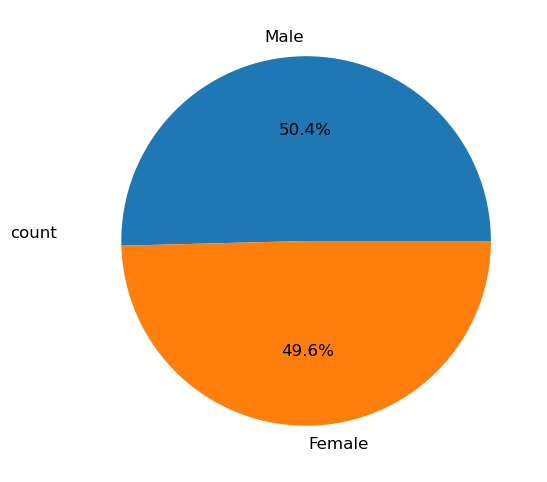

In [68]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_mouse_metadata_complete[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_distribution = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_distribution,
    labels=gender_distribution.index,
    autopct='%1.1f%%',
    colors=['#1f77b4', '#ff7f0e'],
    startangle=0, 
    textprops={'fontsize': 12}
)
plt.ylabel('count', fontsize=12, rotation=0, labelpad=30) 
# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [98]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_mouse_metadata_complete.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, clean_mouse_metadata_complete, on=['Mouse ID', 'Timepoint'])

final_tumor_volume_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(treatment_regimens)]

final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Loop through each treatment to identify potential outliers
for treatment in treatments:
    # Filter the data for the current treatment
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate the IQR
    q1 = treatment_data.quantile(0.25)
    q3 = treatment_data.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}\n")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



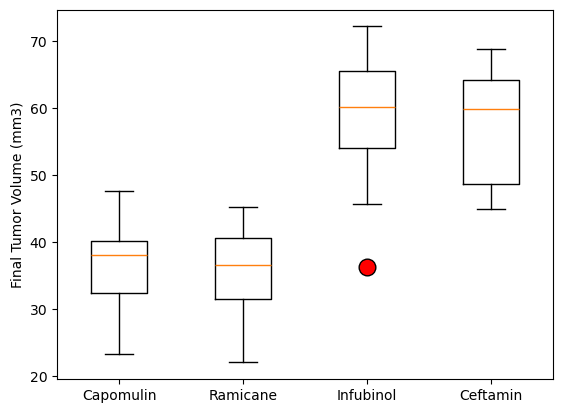

In [ ]:
# Create the box plot for tumor volume distributions
tumor_vol_data_corrected = [
    final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    for treatment in treatments
]

# Create the box plot for tumor volume distributions
fig, ax = plt.subplots(figsize=(8, 6))

# Box plot
boxprops = dict(color='black')
flierprops = dict(marker='o', color='red', markerfacecolor='red',markersize=10)
medianprops = dict(color='orange', linewidth=1.5)

ax.boxplot(tumor_vol_data_corrected, labels=treatments, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

# Add labels and title
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=12)
ax.set_xlabel('Treatment', fontsize=12)



# Show the plot
plt.show()


## Line and Scatter Plots

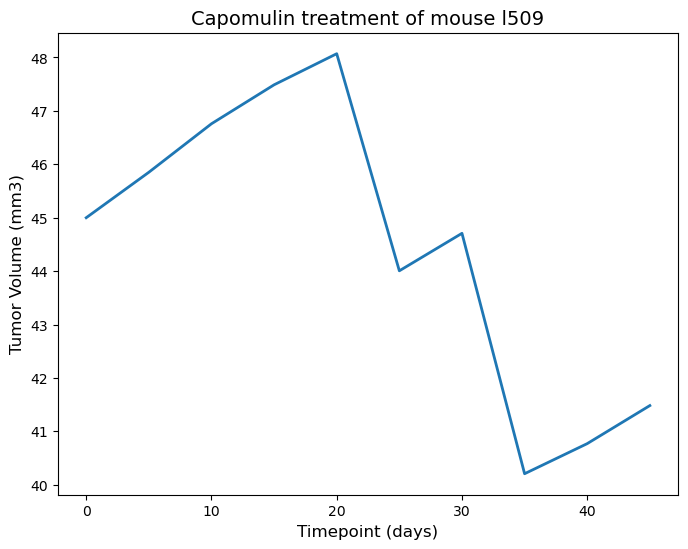

In [86]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = clean_mouse_metadata_complete[
    (clean_mouse_metadata_complete['Mouse ID'] == mouse_id) & 
    (clean_mouse_metadata_complete['Drug Regimen'] == 'Capomulin')
]

# Generate the line plot
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', linewidth=2)
plt.title(f'Capomulin treatment of mouse {mouse_id}', fontsize=14)
plt.xlabel('Timepoint (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)
plt.show()

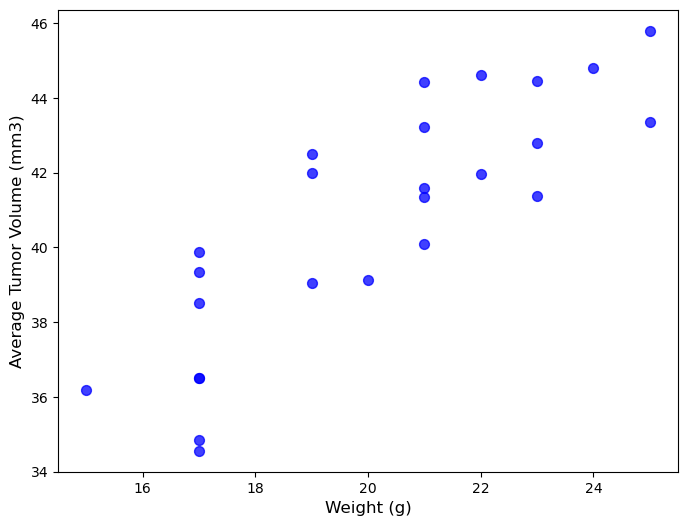

In [90]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_mouse_metadata_complete[clean_mouse_metadata_complete['Drug Regimen'] == 'Capomulin']

# Group by mouse and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
# Generate the scatter plot with circular dots
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, c='blue', s=50, alpha=0.75)
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)


# Show the plot
plt.show()

## Correlation and Regression

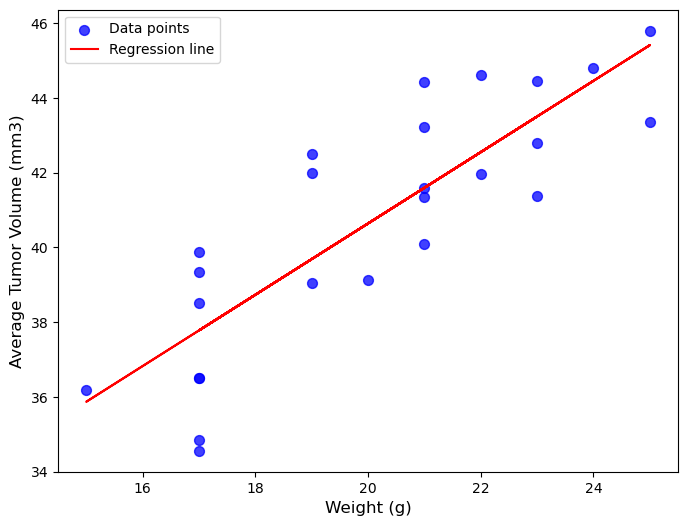

The correlation between mouse weight and the average tumor volume is 0.84.


In [97]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, avg_tumor_volume)

# Create the regression line
regression_line = slope * mouse_weight + intercept

# Generate the scatter plot with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, c='blue', s=50, alpha=0.75,label='Data points')
plt.plot(mouse_weight, regression_line, color='red', label='Regression line')
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)
plt.legend()

# Show the plot
plt.show()

# Print the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}.")
